In [3]:
import numpy as np 
import pandas as pd

In [4]:
movies = pd.read_csv('datasets/tmdb_5000_movies.csv')
credits = pd.read_csv('datasets/tmdb_5000_credits.csv')

In [5]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
credits.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

Merge movies and credits on the basis of 'title' attribute.

In [7]:
movies = movies.merge(credits, on='title')

In [8]:
movies.shape

(4809, 23)

In [9]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Data Cleaning
* **Remove columns which are not necessary for analysis**
* *As it a content based recommendation system we check which column information is useful for the creation of tags.*

#### Column Analysis
* **budget**: not important
* **genres**: very important for tagging the type of movies the user likes
* **homepage**: not important
* **id**: Needed for end product website but not important for analysis
* **keywords**: important for analysis
* **original language**: not important
* **original title**: refactor into title important and always in english
* **overview**: important as if any the summary of any two movies are similar then the movies are also similar.
* **popularity**: not important for content based recommendation
* **production_companies**: not important for recommendation
* **production_countries**: not important
* **release date**: not important for now but incorporate later on.
* **revenue**: not important
* **runtime**: not important
* **spoken languages**: not important
* **homepage**: not important
* **status**: not important
* **tagline**: not important as it is vague, we are keeping overview instead
* **vote_average**: not important
* **vote_count**: not important
* **movie_id**: not important
* **cast**: important as actors can be basis for recommendation
* **crew**: important as directors are significant for recommendation


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [11]:
# genres
# id
# keywords
# title
# overview
# cast
# crew

movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

In [12]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Data Preprocessing

#### Checking for missing values

In [13]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [14]:
# drop the null value columns
movies.dropna(inplace=True)

In [15]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### Checking for duplicate data

In [16]:
movies.duplicated().sum()

0

#### Format data

In [17]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [18]:
# Change from this format (list of dictionary)
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# to ['Action', 'Adventure', 'Fantasy', 'SciFi']

Function to convert genre attribute data to a more easy to process format 

In [19]:
import ast

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):     # literal_eval used to convert string to a list of dictionaries
        L.append(i['name'])
    return L

In [20]:
# the problem with this function is that it is too big and also not generic as this 
# function cannot be applied to other columns as well
# def convert(obj):
#     converted_list = []
#     x = obj.split(",")
#     for i in range(len(x)):
#         if(i%2 == 1):
#             genre_name = x[i]
#             genre_name = genre_name.split(":")
#             genre_name = genre_name[1]
#             if(genre_name[len(genre_name)-1] == ']'):
#                 genre_name = genre_name[2:len(genre_name)-3]  
#             else:
#                 genre_name = genre_name[2:len(genre_name)-2]
#             converted_list.append(genre_name)
#     return converted_list

In [21]:
movies['genres'] = movies['genres'].apply(convert)

In [22]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [23]:
movies['keywords'] = movies['keywords'].apply(convert)

In [24]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Preprocess the cast column. Extract the most famous actors of each movie. Here we choose the first 3 actors.

In [25]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [26]:
def convertCast(obj):
    L = []
    count = 0
    for i in ast.literal_eval(obj):     # literal_eval used to convert string to a list of dictionaries
        if(count != 3):
            L.append(i['name'])
            count += 1
        else:
            break
    return L

For each movie, 3 of the actor's names are selected

In [27]:
movies['cast'] = movies['cast'].apply(convertCast)

In [28]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Convert crew column
* Only interested in the director of the movie

In [29]:
movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [30]:
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):     # literal_eval used to convert string to a list of dictionaries
        if(i['job'].lower() == 'director'):
            L.append(i['name'])
            break
    return L

In [31]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [32]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


Convert Overview from String to a list so that it can be concatenated easily and processed and manipulated easily


In [33]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

Apply lambda function to overview column to split x string into a list

In [34]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [35]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


Apply a transformation to Remove white spaces to create appropriate **TAGs** otherwise each word becomes a seperate entity and the overall model will not be able to recognize correct tags properly.

*'Sam Worthington' to 'SamWorthington'* so that the model doesn't confuse with 

*'Sam Mendes'* which also has sam as seperate entiy

In [36]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ", "") for i in x])

In [37]:
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [38]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [39]:
# concatenate
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [40]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [41]:
new_dataFrame = movies[['movie_id', 'title', 'tags']]

Join columns and merge into tags column

In [42]:
new_dataFrame['tags'] = new_dataFrame['tags'].apply(lambda x:" ".join(x))

C:\Users\Umaar\AppData\Local\Temp\ipykernel_22264\3466393241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataFrame['tags'] = new_dataFrame['tags'].apply(lambda x:" ".join(x))


In [43]:
new_dataFrame.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [44]:
new_dataFrame['tags'] = new_dataFrame['tags'].apply(lambda x:x.lower())

C:\Users\Umaar\AppData\Local\Temp\ipykernel_22264\4293185545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataFrame['tags'] = new_dataFrame['tags'].apply(lambda x:x.lower())


In [45]:
new_dataFrame.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [46]:
new_dataFrame['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [47]:
import nltk

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    # convert this list into a string
    return " ".join(y)

In [50]:
new_dataFrame['tags'] = new_dataFrame['tags'].apply(stem)

C:\Users\Umaar\AppData\Local\Temp\ipykernel_22264\2449018055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataFrame['tags'] = new_dataFrame['tags'].apply(stem)


### Vectorization

### Cosine Similarity
* The workings of the website will be such that user will input a movie and the system will suggest 5 other similar movies. The similarity will be decided on the basis of tags.
Finding out the similarity score from text data.
* Tags must be vectorized.
* As a result each movie will become a vector.
* Closest movie vectors will be recommended.
* Text to Vectors.
* **Bag of words** technique
* Extract word from Large text
* Count frequencies of words in each movie
* Vector generated with frequecies as components
* Stop words will not be counted


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000, stop_words='english')

In [52]:
vectors = cv.fit_transform(new_dataFrame['tags']).toarray()

In [53]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

List all the feature names


In [54]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

Removing similar meaning words using stemming 
* ['loved', 'loving', 'love']  
* ['love', 'love', 'love']

Using Cosine Distance as Ecuclidian distance is not a good measure for higher dimension

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
similarity = cosine_similarity(vectors)

Similarity is an array of arrays. And each array is the similarity between this movie and the movies.

In [57]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

### Recommend function will return 5 similar movies to passed movie parameter

* using enumerate function to keep track of the indices after sorting the similarity list by turning into a tuple of index and similarity
* use lambda to notify that sort using 2nd number

In [58]:
def recommend(movie):
    movie_index = new_dataFrame[new_dataFrame['title'] == movie].index[0]
    distances = similarity[movie_index]
    # use enumerate to remember indexes and select 5 most similar movies
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(new_dataFrame.iloc[i[0]].title)

In [59]:
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [60]:
import pickle

send the dictionary to the website as movies.pkl

In [61]:
#pickle.dump(new_dataFrame.to_dict(), open('movies_dict.pkl','wb'))

similarity matrix

In [62]:
#pickle.dump(similarity, open('similarity.pkl','wb'))

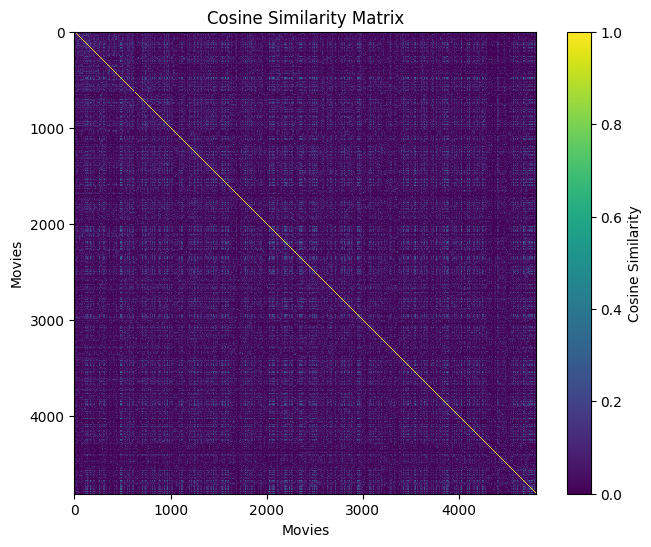

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Sample cosine similarity matrix
cosine_similarity_matrix = similarity

# Plotting the cosine similarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Matrix')
plt.xlabel('Movies')
plt.ylabel('Movies')
plt.show()
